In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [ ]:
credit_data = pd.read_csv("/content/creditcard_2023.csv", encoding="utf-8")

In [ ]:
credit_data.head()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0.0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0.0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0.0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0.0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0.0


In [ ]:
credit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128503 entries, 0 to 128502
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      128503 non-null  int64  
 1   V1      128503 non-null  float64
 2   V2      128503 non-null  float64
 3   V3      128503 non-null  float64
 4   V4      128503 non-null  float64
 5   V5      128503 non-null  float64
 6   V6      128503 non-null  float64
 7   V7      128503 non-null  float64
 8   V8      128503 non-null  float64
 9   V9      128503 non-null  float64
 10  V10     128503 non-null  float64
 11  V11     128503 non-null  float64
 12  V12     128503 non-null  float64
 13  V13     128503 non-null  float64
 14  V14     128503 non-null  float64
 15  V15     128503 non-null  float64
 16  V16     128503 non-null  float64
 17  V17     128503 non-null  float64
 18  V18     128502 non-null  float64
 19  V19     128502 non-null  float64
 20  V20     128502 non-null  float64
 21  V21     12

In [ ]:
credit_data.index = credit_data["id"]
credit_data.drop("id", axis=1, inplace=True)

In [ ]:
credit_data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
id,,,,,,,,,,,,,,,,,,,,,
0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,0.637735,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0.0
1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,0.529808,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0.0
2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,0.690708,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0.0
3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,0.575231,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0.0
4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,0.968046,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0.0


In [ ]:
credit_data.shape

(128503, 30)

In [ ]:
pd.options.display.max_columns = None

In [ ]:
credit_data.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,128503.000000,128503.000000,128503.000000,128503.000000,128503.000000,128503.000000,128503.000000,128503.000000,128503.000000,128503.000000,128503.000000,128503.000000,128503.000000,128503.000000,128503.000000,128503.000000,128503.000000,128502.000000,128502.000000,128502.000000,128502.000000,128502.000000,128502.000000,128502.000000,128502.000000,128502.000000,128502.000000,128502.000000,128502.00000,128502.000000
mean,0.315964,-0.488776,1.001728,-0.655340,0.220081,0.483910,0.443122,-0.129672,0.529021,0.658224,-0.590823,0.775145,0.057605,0.812197,0.283374,0.567284,0.491966,0.347353,-0.261034,-0.134929,-0.123810,-0.126724,-0.045692,0.149407,0.145323,-0.013387,-0.214022,-0.096399,12026.97881,0.002031
std,0.629958,0.687227,0.661527,0.638436,0.608390,0.701930,0.512982,0.247383,0.733874,0.624587,0.622924,0.614401,1.029100,0.527039,1.034851,0.536039,0.306754,0.567772,0.703338,0.744535,0.286481,0.574665,0.607970,1.108926,0.714194,1.078880,0.467347,0.757371,6928.80864,0.045022
min,-3.495584,-49.966572,-2.631176,-4.468314,-5.182978,-21.111108,-3.470512,-10.756342,-2.740952,-2.515992,-4.871031,-1.964099,-5.955227,-2.107417,-3.609738,-2.157727,-2.484938,-2.421949,-7.804988,-27.602574,-19.382523,-7.734798,-30.295450,-4.067968,-13.612633,-7.958110,-10.498633,-29.510941,50.12000,0.000000
25%,-0.167687,-0.652146,0.560706,-0.998604,-0.051702,0.083574,0.247025,-0.182317,0.107482,0.410804,-0.979984,0.391709,-0.615558,0.534269,-0.393687,0.212896,0.317150,-0.004848,-0.667178,-0.337754,-0.194890,-0.525301,-0.196805,-0.551019,-0.302384,-0.774957,-0.306138,-0.110303,6030.67500,0.000000
50%,0.088053,-0.412733,0.907368,-0.545840,0.137507,0.377237,0.410859,-0.134600,0.407506,0.559275,-0.526971,0.716104,0.058204,0.736033,0.329296,0.511812,0.435828,0.260246,-0.234444,-0.189781,-0.127013,-0.128454,-0.070521,0.168974,0.189792,-0.135261,-0.224950,-0.043132,11996.31000,0.000000
75%,0.956380,-0.199712,1.373890,-0.215310,0.351118,0.737195,0.584659,-0.066572,0.815229,0.799633,-0.087591,1.122805,0.738635,0.987383,1.022638,0.847101,0.599414,0.595437,0.183310,0.005847,-0.056991,0.242271,0.060610,0.867000,0.611555,0.647989,-0.138631,0.086857,18020.92500,0.000000
max,1.695400,3.781692,14.125834,3.175853,42.716891,9.704313,41.568286,5.958040,20.270062,31.722709,2.513573,17.913556,4.554510,19.169544,8.740693,9.679455,6.994124,6.783716,3.591997,29.872812,8.087080,12.632511,26.190808,11.035900,10.458350,5.623285,30.339264,77.255937,24039.93000,1.000000


In [ ]:
len(credit_data.drop("Class", axis=1).columns)

29

In [ ]:
columns = credit_data.columns


In [ ]:
## defining the function for plotting the distribution of the features

def dist_plot(columns):

    fig, axes = plt.subplots(nrows=6, ncols=5)

    for col, ax in zip(columns, axes.flatten()):
      sns.distplot(credit_data[col], kde=True, ax=ax)
      plt.grid()
      plt.xlabel(col)

    axes[-1, -1].axis('off')

In [ ]:
# dist_plot(columns)
# plt.tight_layout()
# plt.show()

In [ ]:
credit_data.isna().sum()

V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       1
V19       1
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64

In [ ]:
credit_data["Class"].unique()

array([ 0.,  1., nan])

In [ ]:
def remove_null_values(data):

    credit_data = data.dropna(axis=0)

    return credit_data

In [ ]:
credit_data = remove_null_values(credit_data)

In [ ]:
credit_data.isna().sum()

V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

There are no missing values

**FEATURE SELECTION**

In [ ]:
cleaned_data = credit_data.copy()

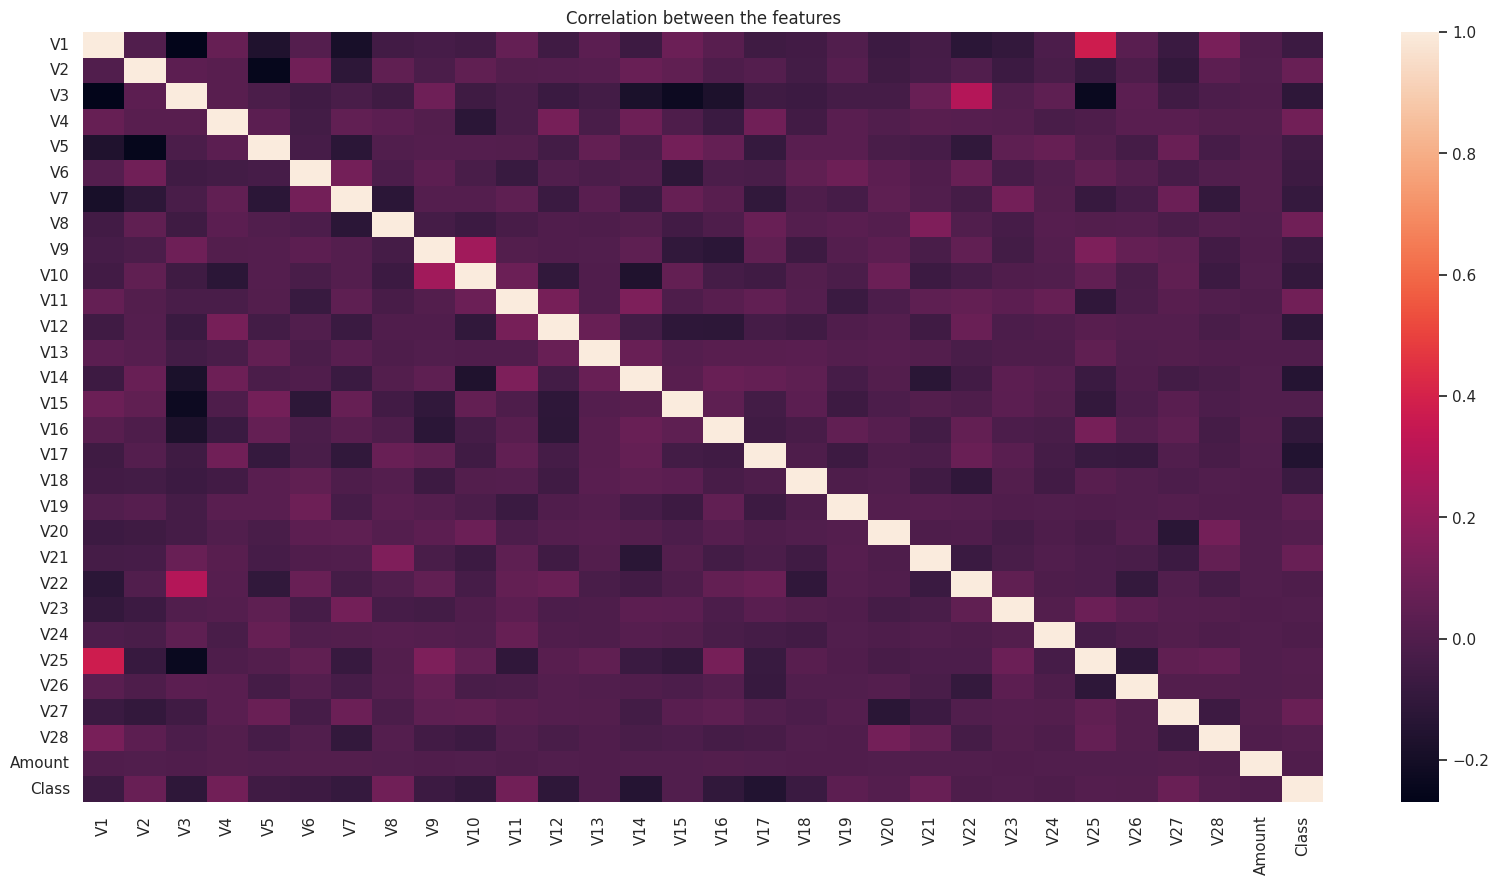

In [ ]:
corr_matrix = cleaned_data.corr()

plt.figure(figsize=(20, 10))
sns.heatmap(corr_matrix, annot=False)
plt.title("Correlation between the features")
plt.show()

In [ ]:
corr_with_class = corr_matrix["Class"].drop("Class")

corr_with_class_sorted = corr_with_class.sort_values(ascending=False)
print(corr_with_class_sorted)

V11       0.100245
V4        0.098716
V8        0.095003
V27       0.074905
V21       0.069558
V2        0.069544
V19       0.037304
V28       0.011104
V20       0.010468
V25       0.009434
V26       0.003592
V15       0.000520
V23      -0.001464
Amount   -0.003723
V13      -0.004505
V24      -0.010180
V22      -0.010986
V5       -0.055346
V6       -0.064909
V9       -0.068421
V1       -0.068879
V18      -0.072207
V7       -0.090355
V10      -0.098144
V16      -0.102232
V3       -0.111311
V12      -0.114893
V14      -0.140559
V17      -0.153114
Name: Class, dtype: float64


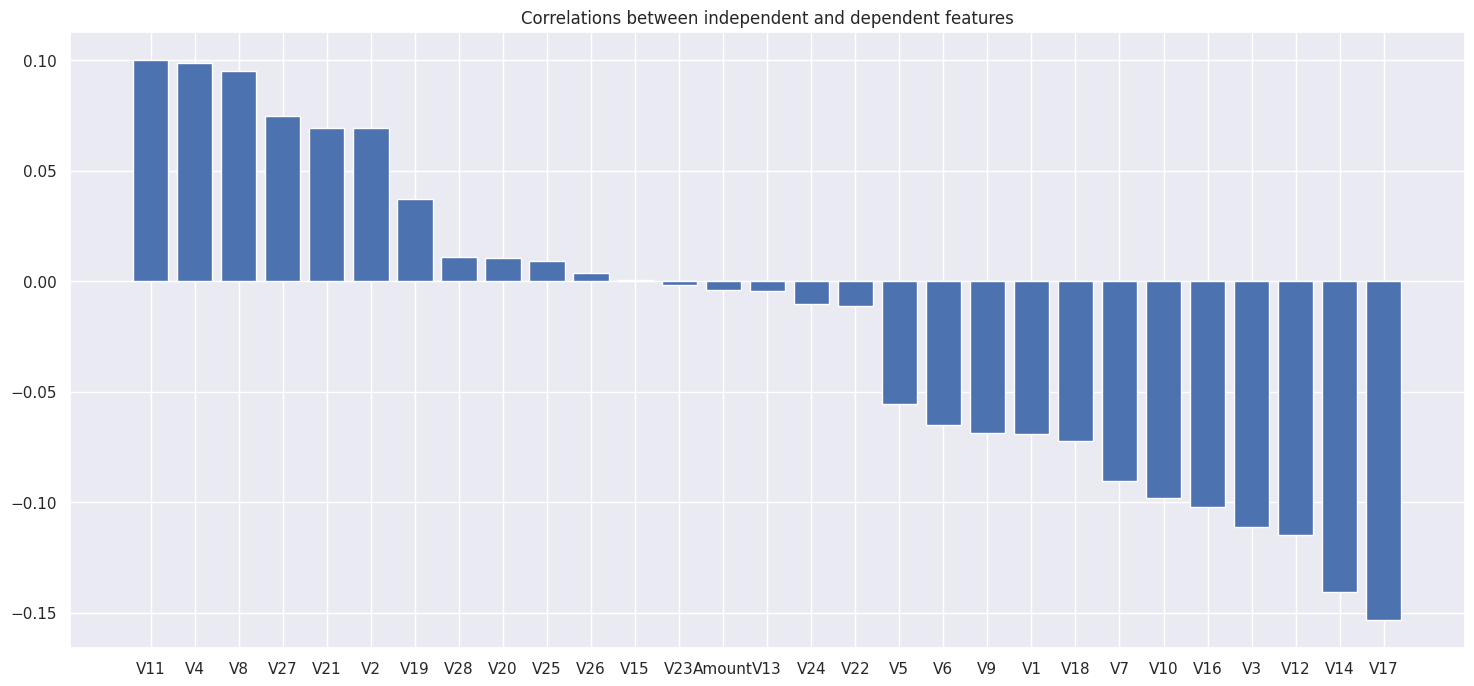

In [ ]:
plt.figure(figsize=(18, 8))
plt.bar(corr_with_class_sorted.index, corr_with_class_sorted.values)
plt.title("Correlations between independent and dependent features")

plt.show()

Considering the feature which having a absolute corr > 0.064

In [ ]:
def new_data(features):

  new_data = cleaned_data.copy()

  threshold = 0.06
  for feature in features:
      if abs(corr_with_class_sorted[feature]) < 0.06:
          new_data = new_data.drop(columns=[feature])

  return new_data

In [ ]:
new_data = new_data(cleaned_data.drop("Class", axis=1).columns)

In [ ]:
new_data.head()

,V1,V2,V3,V4,V6,V7,V8,V9,V10,V11,V12,V14,V16,V17,V18,V21,V27,Class
id,,,,,,,,,,,,,,,,,,
0,-0.260648,-0.469648,2.496266,-0.083724,0.732898,0.519014,-0.130006,0.727159,0.637735,-0.987020,0.293438,0.549020,0.215598,0.512307,0.333644,-0.110552,-0.081230,0.0
1,0.985100,-0.356045,0.558056,-0.429654,0.428605,0.406466,-0.133118,0.347452,0.529808,0.140107,1.564246,0.627719,0.789188,0.403810,0.201799,-0.194936,-0.248052,0.0
2,-0.260272,-0.949385,1.728538,-0.457986,1.419481,0.743511,-0.095576,-0.261297,0.690708,-0.272985,0.659201,0.616874,-0.577514,0.886526,0.239442,-0.005020,-0.300258,0.0
3,-0.152152,-0.508959,1.746840,-1.090178,1.143312,0.518269,-0.065130,-0.205698,0.575231,-0.752581,0.737483,0.559535,-0.030669,0.242629,2.178616,-0.146927,-0.165316,0.0
4,-0.206820,-0.165280,1.527053,-0.448293,0.530549,0.658849,-0.212660,1.049921,0.968046,-1.203171,1.029577,0.241454,0.224538,0.366466,0.291782,-0.106984,0.023712,0.0


**Multicollinearity**

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
feature_data = new_data.drop("Class", axis=1)

vif = pd.DataFrame()

vif["VIF"] = [variance_inflation_factor(feature_data.values, i) for i in range(feature_data.shape[1])]
vif["Features"] = feature_data.columns

vif

,VIF,Features
0,1.273960,V1
1,1.546769,V2
2,2.786281,V3
3,2.026947,V4
4,1.532046,V6
5,1.781437,V7
6,1.355312,V8
7,1.695305,V9
8,2.148937,V10
9,1.793366,V11


In [ ]:
new_data["Class"].value_counts()

Class
0.0    128241
1.0       261
Name: count, dtype: int64

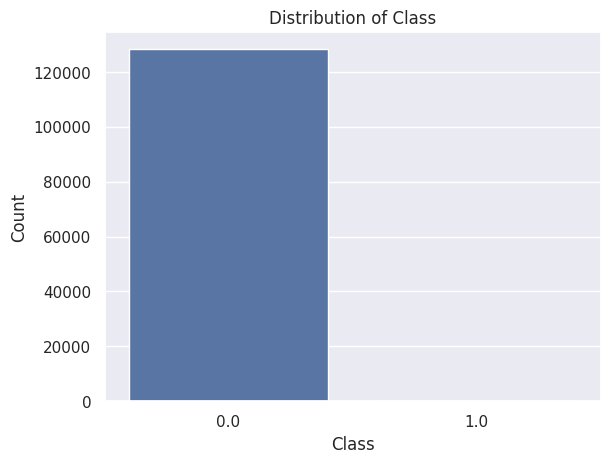

In [ ]:
sns.countplot(data=new_data, x="Class")
plt.title('Distribution of Class')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

The data is highly imbalanced.
Need to balance the data, I'm prefering the undersampling or downsampling

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

In [ ]:
down_sample = RandomUnderSampler(random_state=369)

X = new_data.drop("Class", axis=1)
Y = new_data["Class"]

x_resample, y_resample = down_sample.fit_resample(X, Y)

downsample_df = pd.concat([pd.DataFrame(x_resample, columns=X.columns), pd.DataFrame(y_resample, columns=["Class"])], axis=1)

In [ ]:
downsample_df.head()

,V1,V2,V3,V4,V6,V7,V8,V9,V10,V11,V12,V14,V16,V17,V18,V21,V27,Class
id,,,,,,,,,,,,,,,,,,
38990,0.344236,-0.782083,0.270581,-2.308061,2.444132,0.281107,-0.042955,-0.408124,1.596142,-0.822201,-0.009238,0.382743,0.357587,0.404217,1.098228,-0.106748,-0.309103,0.0
67922,-0.047147,-0.048939,0.777495,-0.664821,0.136044,0.537207,-0.044937,0.291639,0.333637,-1.604681,0.248125,0.720290,1.069535,0.417372,0.527082,-0.219090,-0.108688,0.0
77996,0.862456,-0.651574,0.308212,-0.519570,2.491241,0.133945,0.102898,1.000503,0.523975,-0.996747,0.833908,0.602207,0.752288,0.227127,0.607996,-0.128509,-0.170545,0.0
100361,-0.101714,-0.276148,1.542785,-0.824294,0.628471,0.386188,-0.024434,1.039480,0.178835,-2.183263,1.103931,0.361483,0.159306,0.702724,-0.200301,-0.271070,-0.505217,0.0
7285,-0.042757,-0.111204,1.677283,-0.089840,0.627412,0.609310,-0.141487,1.439352,0.720501,0.289712,-0.314665,2.082724,-0.058937,0.914682,0.443375,-0.195826,0.174261,0.0


In [ ]:
downsample_df.shape

(522, 18)

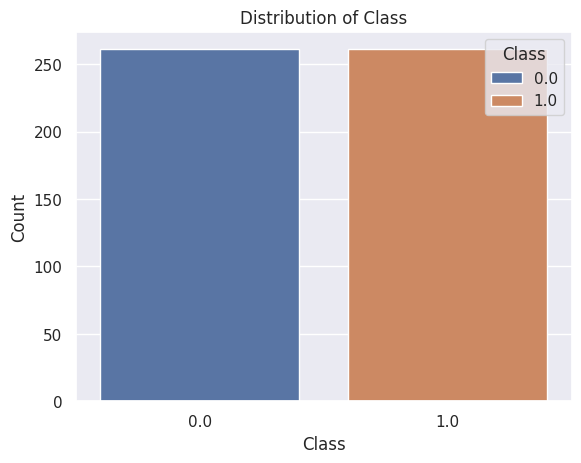

In [ ]:
sns.countplot(x="Class", data=downsample_df, hue="Class")
plt.title('Distribution of Class')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

In [ ]:
def boxplot(data):

  features = data.drop("Class", axis=1).columns

  fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(20, 16))
  for ax, col in zip(axes.flatten(), features):
      ax.boxplot(data[col])
      plt.xlabel(col)
      plt.grid()

  # Turn off any remaining unused subplots
  for i in range(17, len(axes.flatten())):
      axes.flatten()[i].axis('off')

  plt.tight_layout()
  plt.show()

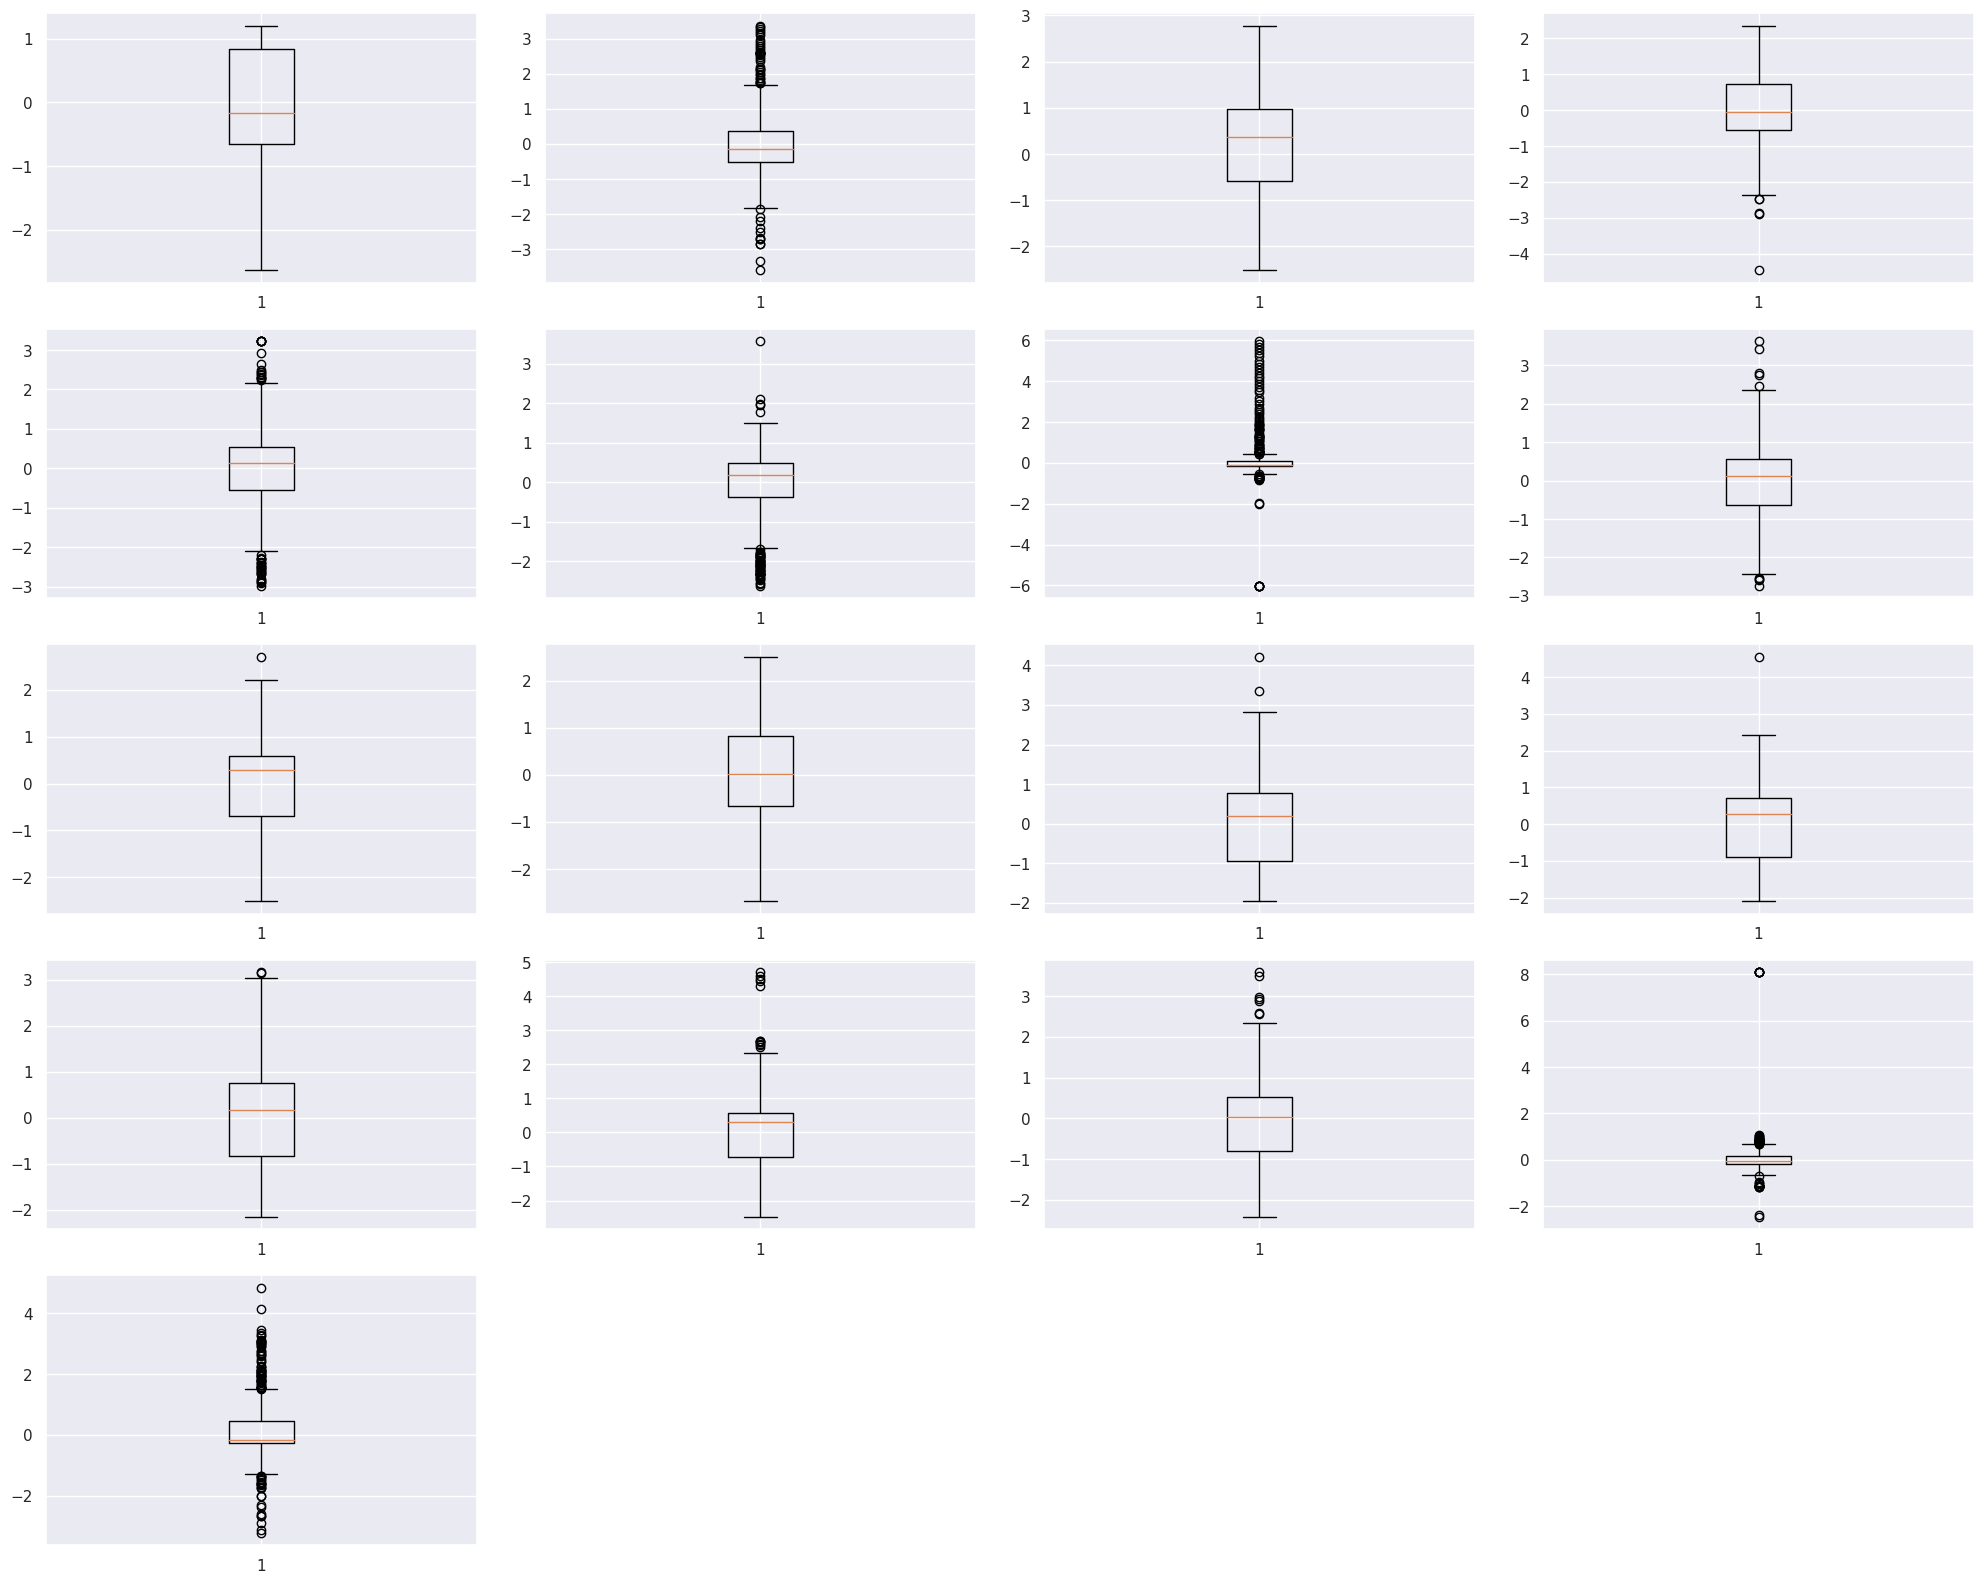

In [ ]:
boxplot(downsample_df)

In my perspective removing these many datapoints will not be a good option

**Splitting the data**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
targets = downsample_df["Class"]
inputs = downsample_df.drop("Class", axis=1)

train_data, test_data, train_labels, test_labels = train_test_split(inputs, targets, test_size=0.2, random_state=369)


**MODEL BUILDING**

In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier

In [ ]:
# class Model_building:

#     def __init__(self):
#       pass

#     def rf_model(self):
#       rf = RandomForestClassifier()

#     def gb_model(self):
#       pass

#     def lr_model(self):
#       pass

In [ ]:
## randomforest model
rf_model = RandomForestClassifier()

## gradientboosting model
gb_model = GradientBoostingClassifier()

## logistic regression model
lr_model = LogisticRegression()

In [ ]:
n_estimators = np.arange(20, 250, 10)
max_depth = np.arange(1, 15)
max_features = np.arange(1, len(train_data.columns))
max_samples = [0.4, 0.5, 0.75, 1]

In [ ]:
rf_params = {
              "n_estimators": n_estimators,
              "max_depth": max_depth,
              "max_samples": max_samples,
              "max_features": max_features
             }

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
rf_ = RandomizedSearchCV(rf_model,
                        param_distributions=rf_params,
                        cv=10,
                        n_jobs=-1,
                        error_score="raise",
                        random_state=369)

rf_.fit(train_data, train_labels)

RandomizedSearchCV(cv=10, error_score='raise',
                   estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                                        'max_features': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
                                        'max_samples': [0.4, 0.5, 0.75, 1],
                                        'n_estimators': array([ 20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130, 140,
       150, 160, 170, 180, 190, 200, 210, 220, 230, 240])},
                   random_state=369)

In [ ]:
rf_.best_estimator_

RandomForestClassifier(max_depth=9, max_features=7, max_samples=0.5,
                       n_estimators=130)

In [ ]:
gb_params = {
    'learning_rate': np.linspace(0.01, 0.2, 10),
    'max_depth': np.arange(3, 10),
    'min_samples_split': np.arange(2, 11),
    'min_samples_leaf': np.arange(1, 11),
    'max_features': ['sqrt', 'log2'],
    'subsample': np.linspace(0.6, 1.0, 5)
}

In [ ]:
gb_ = RandomizedSearchCV(gb_model,
                        param_distributions=gb_params,
                        cv=10,
                        n_jobs=-1,
                        error_score="raise",
                        random_state=39)

gb_.fit(train_data, train_labels)

RandomizedSearchCV(cv=10, error_score='raise',
                   estimator=GradientBoostingClassifier(), n_jobs=-1,
                   param_distributions={'learning_rate': array([0.01      , 0.03111111, 0.05222222, 0.07333333, 0.09444444,
       0.11555556, 0.13666667, 0.15777778, 0.17888889, 0.2       ]),
                                        'max_depth': array([3, 4, 5, 6, 7, 8, 9]),
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
                                        'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10]),
                                        'subsample': array([0.6, 0.7, 0.8, 0.9, 1. ])},
                   random_state=39)

In [ ]:
gb_.best_estimator_

GradientBoostingClassifier(learning_rate=0.07333333333333333, max_depth=9,
                           max_features='sqrt', min_samples_leaf=9,
                           min_samples_split=6, subsample=0.7)

**Evaluation**

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

In [ ]:
rf_trained_model = rf_.best_estimator_

rf_pred = rf_trained_model.predict(test_data)

In [ ]:
gb_trained_model = gb_.best_estimator_

gb_pred = gb_trained_model.predict(test_data)

In [ ]:
voting_clf = VotingClassifier(estimators = [('rf', rf_trained_model),
                                          ('gnb', gb_trained_model)],
                              voting= 'hard',
                              n_jobs = -1)

voting_clf.fit(train_data, train_labels)

VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(max_depth=9,
                                                     max_features=7,
                                                     max_samples=0.5,
                                                     n_estimators=130)),
                             ('gnb',
                              GradientBoostingClassifier(learning_rate=0.07333333333333333,
                                                         max_depth=9,
                                                         max_features='sqrt',
                                                         min_samples_leaf=9,
                                                         min_samples_split=6,
                                                         subsample=0.7))],
                 n_jobs=-1)

In [ ]:
voting_pred = voting_clf.predict(test_data)

print(f" Voting Classifier has the accuracy of : {accuracy_score(test_labels, voting_pred)}")

 Voting Classifier has the accuracy of : 0.9142857142857143


In [ ]:
print(f"Random Forest Model Accuracy  : {accuracy_score(test_labels, rf_pred)}")

print()

print(f"Gradient Boosting Model Accuracy : {accuracy_score(test_labels, gb_pred)}")

Random Forest Model Accuracy  : 0.9142857142857143

Gradient Boosting Model Accuracy : 0.9238095238095239


In [ ]:
print(f"Random Forest Model classification Report : \n{classification_report(test_labels, rf_pred)}")

print()

print(f"Gradient Boosting Classification Report : \n{classification_report(test_labels, gb_pred)}")

Random Forest Model classification Report : 
              precision    recall  f1-score   support

         0.0       0.85      1.00      0.92        50
         1.0       1.00      0.84      0.91        55

    accuracy                           0.91       105
   macro avg       0.92      0.92      0.91       105
weighted avg       0.93      0.91      0.91       105


Gradient Boosting Model Accuracy : 
              precision    recall  f1-score   support

         0.0       0.86      1.00      0.93        50
         1.0       1.00      0.85      0.92        55

    accuracy                           0.92       105
   macro avg       0.93      0.93      0.92       105
weighted avg       0.93      0.92      0.92       105

